# 为什么要学js

一般的爬取，在网页的服务端将数据和html组装好，返回给浏览器，浏览器拿到了页面的源代码，数据都在页面源代码中，我们模拟发送请求就能拿到数据，
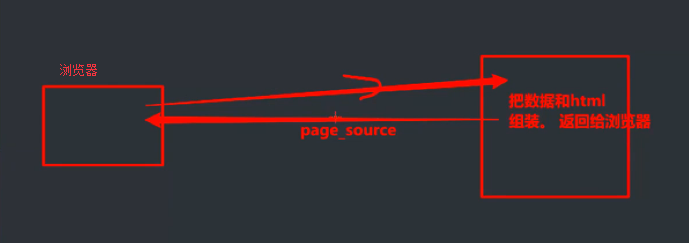

另一种的是，网页服务端返回给浏览器一个页面结构html，浏览器只有一个结构，想要拿到数据就得发送另外一些请求，另一些请求就是通过**js**来发送，会拿到数据，然后通过js将结构和数据进行组合
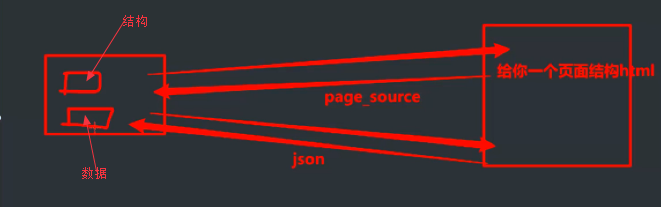


javascript是逆向的一个灵魂，可以向后端发送请求，可以操作页面上的结构，数据。

我们关心的js的功能：
- 如何发送请求
- 请求如何响应
- 响应如何处理

有些网站的数据是很值钱的，所以不可能直接原始数据在请求或者响应中，一般都会加密

发送请求(请求参数，请求头，cookie中的内容等进行加密)->处理响应，返回json(把数据进行加密)->js进行解密，将数据展示给用户

要拿到数据，就得想办法阅读js的加密过程，能够发送出让服务器接收的请求；阅读js解密的过程，将服务器响应回来的加密数据进行还原。

**主要的是：**阅读理解js的加密和解密逻辑

js逆向很痛苦(压缩的js，被混淆的js)，js这个语言很简单。

# 基础入门

js是嵌入在html中的脚本语言。

js引入和编写

基本数据类型

```js
number  数字, 不论是整数还是小数, 数据类型都是number
string  字符串, 这个没啥可聊的. 就是很单纯的字符串
boolean  布尔值, 只有两个, true和false. 注意不是大写T和F. 
object 对象, 这个比较特殊. 你可以理解为所有被new出来的东西都是对象  
undefined, 这个表示未定义. 所有没有被定义过的东西默认都是该类型 类似像空一样的东西
```

创建变量：
```js
// 在声明变量时给上变量值
var name = "xxx";
let age = 18;
const gender = '男';

// 先声明变量，在后面给变量给值
var name,age,gender;
name = 'xxx';
age = 18

var a, b, c, d =5, e = 6;  // 声明一堆变量，有的有值，有的没有值
// 这段代码表示a b c 是声明变量，d e 是声明同时给值。和python中的解包不一样
```

运算符
```js
逻辑运算符一样，逻辑运算符如下
// &&  逻辑与
// ||  逻辑或
//  !  去反
```

== 和 ===
```
== 判断的是两个值是否是相同
=== 判断类型和值都是否相同
```

数据类型转换
```js
// string -> number  :  parseInt(字符串)
var a = "10086";
a = parseInt(a);  // 变成整数
console.log(a + 10); // 10096

// number -> string  : 数字.toString() 或者 数字 + ""
var a = 100;
var b = a.toString();
var c = a + "";  
console.log(b);
console.log(c);

// number -> string: 数字转化成16进制的字符串
var m = 122;
var n = m.toString(16);
console.log(n);

// 进制转换
var a = 10;
// 将十进制的数字转换为16进制的字符串
var x = a.toString(16);  // a， 逆向的时候能见到

// AB的十进制是多少，将16进制的字符串转换为十进制的数字
var d = parseInt("AB", 16); // 171
```

字符串的操作
```js
s.split()  字符串切割，需指定按照那个字符进行切割
s.substr(start, len)  字符串切割, 从start开始切, 切len个字符
s.substring(start, end)  字符串切割, 从start切割到end，[start, end)
s.length  字符串长度
s.charAt(i) 第i索引位置的字符
s.charCodeAt(2) 索引为2的字符的编码(字母就是ascii码位置，中文就是unicode的位置)
s.indexOf('xxx')  返回xxx的索引位置, 如果没有xxx. 则返回-1
s.lastIndexOf("xxx") 返回xxx的最后一次出现的索引位置，如果没有xxx. 则返回-1
s.includes("xxx") 判断xxx是否出现在s中. in 
s.toUpperCase() 转换成大写字母
s.startsWith("xxx")  判断是否以xxx开头


String.fromCharCode('97')  # a, 将编码还原成字符串


// 逆向中常见
s = "callback_jsonp({'name': 'alex', 'age': 18, wife:  {'name': '汪峰'}})";
var result = s.substring(s.indexOf("{"), s.lastIndexOf("}") + 1);  // 拿到字符串中的json内容
```

条件分支

循环

# js的数组和对象

## 数组

```js
// 创建数组，其类型是object，本质上也是new Array()
var as = [11,22,33,44,55];
var bs = new Array(11,22,33,44,55)  // 在创建对象时，也可以省略后面的括号，bs=new Array; 创建的是一个空数组

// 数组常用操作
arr.length;  // 数组长度
arr.push(data);  // 在数组后面添加数据
arr.pop();  // 删除数据, 从后面删除, 并返回被删除的内容
arr.shift()  // 删除数据, 从前面删除, 并返回被删除的内容
arr.unshift(xxx); // 在数组之前增加数据
arr.flat(); // 扁平化处理数组

// arr中的每一项循环出来. 分别去调用function函数, 会自动的将`数据`传递给函数的第一个参数
arr.forEach(function(e, i){  // 第二个参数是可选的，自动拿出列表中的每一项然后传递个函数执行，函数一个参数就接收数据的元素，两个参数就接收 元素,索引
    console.log(i+"__"+e);
});
arr.join("连接符");  // 使用`连接符`将arr中的每一项拼接起来. 和python中的 "".join()雷同

// for循环遍历数组
for (i in a){
    console.log(i)  # i是数组的索引
    console.log(a[i]) # 拿到数组的值
}
```

使用：
```js
var arr = new Array; // 在前端 . 创建对象的时候. 可以不给出()， 创建空数组
console.log(arr);  // []
console.log(typeof arr) // object
```

## 对象

```js
// 创建一个对象，和oython中的字典一样，前端的key可以是""括起来的. 也可以省略掉这个""
var p = {
    name: "汪峰",
    age: 18,
    wife: "章子怡",
    
    chi: function(){
        console.log("吃饭")
    }
};

// 把对象变成json字符串: JSON.stringify(p)
// 把字符串变成对象: JSON.parse("{...}")


/*使用对象*/
p['name']  // 获取name
p.name  // 获取name
p.chi()  // 获取chi，并执行chi
p['chi']() // 获取chi，并执行chi

p.child = [] // 增加一个属性， 等价于 p["child"]=[]


/*列表的push另一种写法，列表也是对象，可以通过["push"]或.push来获取属性.
这两个方式可以混搭：a.xx["bb"]['dd']['ee'].gg()
*/
var arr = [11,22,33]
arr["push"]("heh")  // 等价于arr.push("heh")
```

# js函数

## 普通函数
```js
// 声明函数
function 函数名(形参1, 形参2, 形参3....){
    函数体
    return 返回值
}
// 调用函数
函数名(实参1, 实参2, 实参3....)
```

函数名字
```js
function _(){
    console.log("我是一个$函数");
}
_();  // $, _ 就是普通字符 -> 1是为了简单, 2是为了绕你
```

函数的运行机制：

从上往下一行一行跑，跑到函数声明处，开辟一块内存空间，将代码体放到内存中，然后在将函数名指向这块内存。跑到 函数名() 处,就会运行函数名指向的内存地址的函数体代码。

函数名也就是一个变量，这个变量存储的值是存放函数体代码的内存地址。
```js
function fb(){
    console.log(123)
}

fb()  // 执行函数体代码

fz = fb; // 将fb的值给fz，就是将内存地址给fz
fz(); // 调用fz的值(内存地址)的代码

// 函数的运行不是依赖于函数名，而是依赖于内存地址
```

在数组中声明函数
```js
var arr = [
            function(){
                console.log("我是0");
            },
            function(){
                console.log("我是1");
            },
            function(){
                console.log("我是2");
            }
        ];


// 执行数组中的函数
for(var i = 0; i < arr.length; i ++){
    g = arr[i];
    g();
}
```
数组中存的是函数的内存地址
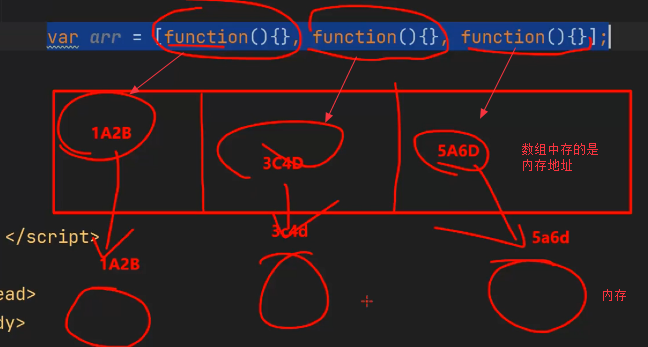

声明时并运行，叫自运行函数。**在前端中大量会有自运行这种代码**
```js
(function(){console.log("学校")})();

/*
函数声明部分：函数没有名字 (function(){console.log("学校")})
加括号可直接调用 (function(){console.log("学校")})();
*/

// 自运行函数传参和接收返回值
var x = (function(a){  // 形参->变量
    console.log("我爱你"+a);
    return "我是返回值"
})(123456); // 自运行函数
console.log(x) // 我是返回值
```



## window对象



js默认的一个对象，直接拿来使用，表示全局作用域，在文件中的变量都属于window。如果我们默认不用任何东西访问一个标识符. 那么默认认为是在用window对象. 
```js
a = 10  // 相当于在window中创建了一个a
// a 和 window.a 等价
console.log(a)
console.log(window.a)

// eval === window.eval
```

将函数中的内容传递到外面，一种是return返回，还有一种是将window作为参数
```js
// window作为参数，拿到函数中的结果

(function(w){w.res = '我是结果'})(window);  // 也可以不传参(function(){window.res = '我是结果'})()
console.log(res)  // 从函数中拿到的res
```

为了不让轻易被看出代码，不容易被逆向，会将window先给一个变量，在后续都使用这个变量，不能见名知意。
```js
var _w = window

// 或者
var _w = eval('window')  // 'window' 可能还会被混淆加密
```

## 对象中的this

在对象中，使用当前对象的其他属性
```js
var wf = {
    name: "子怡",
    age: 199,
    songs: ["吹天理", "夏天不里", "秋天奖励", "冬天美丽"],
    chi: function(){
        // this就是当前对象
        console.log(this.name + "喜欢吃饭"); // this关键字
        this.he("北冰洋");
    },
    he: function(yinliao){
        console.log(this["name"] + "在喝"+ yinliao);
    }  // 7
}
```

## 函数的 return
```js
// 前端js中不存在多个返回值，前端return 多个逗号隔开，返回的是最后一项

function fn(){
    return 1,2,3,4;  // 会先执行逗号隔开的代码，然后返回最后一个执行完的结果
}

var r = fn();
console.log(r)  // => 4
```

多个return的代码如下： 
会用来绕你
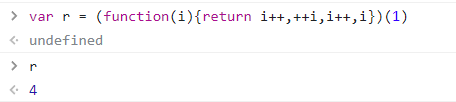

可以将这种代码进行修改：将return除了最后一项，其他的全放到return之前执行
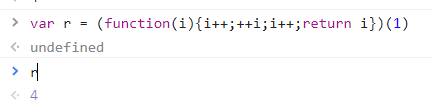

# js进阶

## 定时器

- 过多场时间后执行某个函数`setTimeout`
- 每个多少执行某个函数``

两个的时间单位是 毫秒

setTimeout
```js
// 设置定时器
let t = setTimeout(function(){
    alert("定时")
}, 1000);  // 单位毫秒

// 清楚掉定时器
window.clearTimeout(t)
```

setInterval
```js
// 设置定时器
let t = setInterval(function() {
    alert("警告")
}, 1000)

// 停掉定时器
window.clearInterval(t)


// 设置多少次后停掉定时器
var i = 1;
let n = setInterval(function(){
    i++;
    if (i == 10){
        window.clearInterval(n);
    }
    alert("爆炸");
}, 1000)
```

定时器的返回结果是一个数字，其返回结果说明这是第几个定时器(定时器的编号)，停掉对应的定时器，要将定时器的编号作为参数。

在前端时，不会将定时器赋值给某个变量，在浏览器的console控制台停止掉定时器：
```js
// 不确定有多少个定时器，停掉全部的定时器
for (let i=0; i<=9999; i++){
    window.clearInterval(i);  // 关掉所有的定时器
}
```


## 关于时间

```js
var d = new Date(); // 获取系统时间
var d = new Date("2018-12-01 15:32:48"); // 得到一个具体时间

// 时间格式化
year = d.getFullYear();  // 拿到年份
month = d.getMonth() + 1; // 拿到月份. 注意月份从0开始
date = d.getDate();   // 拿到日期
hour = d.getHours();   // 拿到小时
minute = d.getMinutes();  // 分钟
seconds = d.getSeconds();  //秒

format_date = year + "-" + month + "-" + date + " " + hour + ":" + minute + ":" + seconds;

d.getTime()  // 时间戳. 表示从1970-1-1 00:00:00 到现在一共经过了多少毫秒
```

前端的时间戳：
```js
d = new Date();
d.getTime();  // => 1653652478545
```

python时间戳
```python
import time

print(time.time())  # => 1653652616.7985682

# python的时间戳伪装成前端的时间戳
t = int(time.time()*1000)
```
python的单位是秒，前端的单位是毫秒。


后端防止浏览器做缓存时，会在url中加上时间戳最为参数`http://www.baidu.com/s/1.html?_=1640090714565`

也可能使用时间戳来计算你的访问频率。也可能为了做一些校验。80%会用来做防止浏览器缓存

## eval函数

从功能上讲, eval非常简单. 它和python里面的eval是一样的. 它可以动态的把字符串当成js代码进行运行. 

```js
s = "console.log('我爱你')";
eval(s);  // eval的参数一定是个字符串


// eval的变态使用
eval(function(){return "console.log('我爱你');"}());  // => 我爱你

```

### eval 反爬

网站：https://www.w3cschool.cn/tools/index?name=evalencode  将代码进行eval加密

eval的参数是个字符串，有些网站会对代码进行混淆，混淆之后如下：
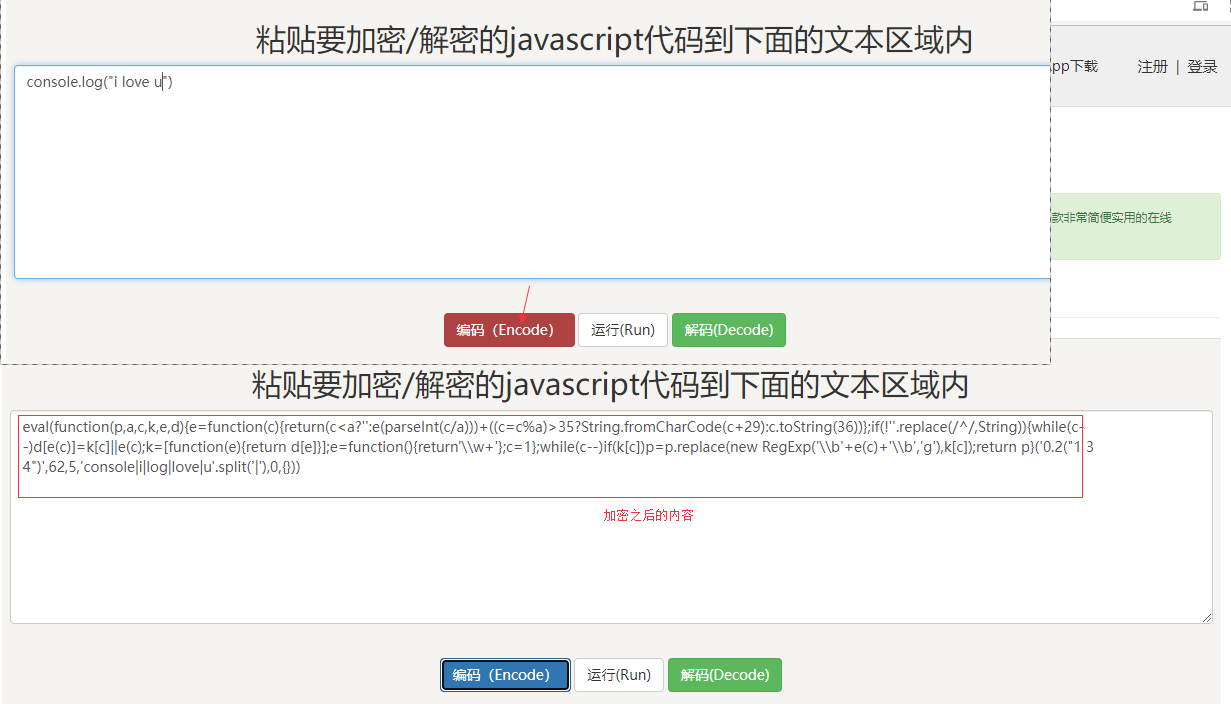


解决eval加密的流程
- 把eval中的函数提取出来. 丢到浏览器
- 用该函数加上eval后半段的参数一起执行. 得到真正的js代码

```js
// 1. 在网站上只要看到eval("一堆看不懂的字符串");
eval(function(p,a,c,k,e,d){e=function(c){return(c<a?'':e(parseInt(c/a)))+((c=c%a)>35?String.fromCharCode(c+29):c.toString(36))};if(!''.replace(/^/,String)){while(c--)d[e(c)]=k[c]||e(c);k=[function(e){return d[e]}];e=function(){return'\\w+'};c=1};while(c--)if(k[c])p=p.replace(new RegExp('\\b'+e(c)+'\\b','g'),k[c]);return p}('0.2("1 3 4")',62,5,'console|i|log|love|u'.split('|'),0,{}))

// 2. 将eval中的参数拷贝出来，参数是一个函数，他肯定会返回字符串
fn = function(p,a,c,k,e,d){e=function(c){return(c<a?'':e(parseInt(c/a)))+((c=c%a)>35?String.fromCharCode(c+29):c.toString(36))};if(!''.replace(/^/,String)){while(c--)d[e(c)]=k[c]||e(c);k=[function(e){return d[e]}];e=function(){return'\\w+'};c=1};while(c--)if(k[c])p=p.replace(new RegExp('\\b'+e(c)+'\\b','g'),k[c]);return p}

// ('0.2("1 3 4")',62,5,'console|i|log|love|u'.split('|'),0,{}) 这是参数

// 3. 执行函数
res = fn('0.2("1 3 4")',62,5,'console|i|log|love|u'.split('|'),0,{})

// res  就是可供阅读的字符串形式的js代码
// 'console.log("i love u")'
```

## 闭包函数

在函数内部是可以直接修改全局变量的

```js
var name = "a";  // 不安全的  ???
function fn(){
    name = "w";
}
fn();
console.log(name);  // => w

/*
执行顺序是
1.函数中先在自己函数内部找有没有变量name，没有的话去外层找变量name，找到了一个全局的变量name，给其赋值为'w'.
2.console.log(name);是也是先在自己当前作用域找name，找到了name，将其打印，这个时候name的值已经被函数中给修改了
3. 最后打印的是w
*/
```

全局变量可以随意的进行修改，是很危险的，变量的稳定性是很差的，随时会被修改掉。

**不安全的案例：**

js文件1：qq.js
```js
var name = "alex"; // 要使用全局中的name
setTimeout(function(){
    console.log(name, "给我洗脚");  // 在飞翔的角度: 5秒钟后, alex给我洗脚     a  , w
}, 5000);
```

js文件2：kk.js
```js
setTimeout(function(){
    name = "wusir";  // 这里修改的是全局中的name的值.
}, 2000);
```
这两个代码导入到同一个文件中
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
    <script src="qq.js"></script>
    <script src="kk.js"></script>
    <script>
    </script>
</head>
<body>

</body>
</html>
```
结果在控制台打印：`wusir 给我洗脚`

是因为在kk.js中将qq.js中的全局变量给修改了，两块代码共用一个全局作用域。造成了不是预期的结果。


**解决多个文件中不安全的全局变量**

使用闭包，闭包就是将全局的变量写到函数中去，让这个变量不再共享。

修改qq.js文件
```js
function fn(){
    var name = "alex"; // 保证它的安全
    setTimeout(function(){
        console.log(name, "给我洗脚");
    }, 5000);
};

fn()
```
这样结果就在预期内了。但是这个函数要声明之后立马运行，函数名就不用写了，使用自运行的方式
```js
(function(){  // 创建一个自运行函数. 让里面的代码可以像普通js引入一样. 正常执行.
    var name = "alex"; // 保证它的安全
    setTimeout(function(){
        console.log(name, "给我洗脚");
    }, 5000);
})()

```

如果要在qq.js中写一个加密算法，如何将qq.js中写的加密算法给到外界？
```js
(function(){  // 创建一个自运行函数. 让里面的代码可以像普通js引入一样. 正常执行.
    var miyao = '1233333';  // 加密一般都需要秘钥，秘钥不能暴露给外界
    var jiami = function(data) {
        console.log("使用秘钥"+miyao+"对"+data, "进行加密")  // 内层函数对外层函数中的变量进行了使用. 闭包
    };
    return jiami;  // miyao不会暴露给外界
})()
```


多个加密算法
```js
var jm = (function(){
    var miyao = "123456789";
    var process = function(data){
        console.log("我要先处理一下数据", data);
    }
    return {
        jiami_1:function(data){  // 内层函数对外层函数中的变量进行了使用. 闭包
            process(data)
            console.log("我用秘钥:"+miyao+"对", data, "进行加密_1");
        },
        jiami_2:function(data){  // 内层函数对外层函数中的变量进行了使用. 闭包
            // 先调用jiami_1先来一波.然后再进行进一步的加密
            this.jiami_1(data); // 对象自身中的函数互相调用, 要用到this
                      // this是当前对象  -> self  -> this
            process(data)
            console.log("我用秘钥:"+miyao+"对", data, "进行加密_2");
        }
    }
})();
```

## prototype  原型

可以在原有类的基础上扩充功能

js中有种写法可以实现面向对象的逻辑
```js
// 当使用到this关键字时，会升华为类的概念
// ES6之前
function Person(name, age){  // 想象成一个类
    // 属性的描述, 属性信息. name, age
    this.name = name;
    this.age = age;
    // 动作的描述, 方法->函数, chi(), he()
    this.chi = function(){
        console.log(this.name, "在吃东西");
    }
}

let p1 = new Person("alex", 18);
let p2 = new Person("wusir", 19);

p1.chi();  // alex
p2.chi();  // wusir

// prototype可以给类新加属性方法
Person.prototype.wowoxx = function(){
    console.log(this.name, "在龌龌龊龊")
}

p1.wowoxx();
```

## call 和 apply

这两个都是调用，都可以完成函数的调用，只需要知道这两个东西的执行顺序

```js
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
    <script>
        function People(name, age){
            this.name = name;
            this.age = age;
            this.chi = function(){
                console.log(this.name, "在吃东西")
            }
        }
        let p1 = new People("alex", 18);
        let p2 = new People("wusir", 20);
        p1.chi();
        p2.chi();

        // function eat(what_1, what_2){
        //     console.log(what_1, what_2);
        // }
        //
        // eat("大米饭", "馒头");
        // // 调用, 两部分参数:
        // //      1. 哪个对象调用eat, 如果没有. 默认一般传window
        // //      2. 真正该函数被执行时传递的参数
        // eat.call(window, "大米饭", "馒头");  // 相当于 window.eat("大米饭", "馒头")
        // eat.apply(window, ["大米饭", "馒头"]);  // 传递给eat的参数是一个列表

        function eat(what_1, what_2){
            console.log(this.name, what_1, what_2);  // 谁通过call调用这个eat，this就是谁
        }

        eat.call(p1, "大米饭", "包子");
        eat.call(p2, "大米饭2", "包子2");
        // 注意, eat中的this是谁? 没人知道. 在运行的时候, 传递的是谁. this就是谁.
        // 所有的对象都可以调用eat方法，给所有对象(对象中有属性name)都提供了 一个通用的函数
    </script>
</head>
<body>

</body>
</html>
```

## 箭头函数

函数的新写法
```js
// es6中新语法
let fn = (a,b) =>{
    return a+b;
}
fn(1,2)

// 一个参数可以省略括号
let fn = name => {
    console.log(name)
}
```

## es6的promise

对代码的执行顺序修改了，不是按照原来从上往下的顺序执行了。

网站要完整的展示给用户，要发送多次请求：
- 第一次请求，获取到了页面的结构
- 第二次请求，获取到第一份数据
- 在拿到第一份数据的基础上，再去发送第三次请求，获取第二份数据
- 在拿到第二份数据的基础上，再去发送第四次请求，获取第三份数据

promise是一种类型，向后端发送请求，并拿到数据，固定写法
```js
创建一个Promise对象，固定的往里传递 一个函数

// resolve: 确定
// reject: 不确定, 有问题

let p =new Promise(function(resolve, reject){
    console.log("发送网络请求", url);  // 模拟发送网络请求数据
    setTimeout(function(){  // 等待一段时间，获取响应数据
        console.log("得到了结果. 接下来准备去渲染页面.")
        let data = "我是数据";
        // 讲道理. 这里可以做判断了. 服务器返回了数据. 或者 请求失败了. 没拿到数据
        if(data){ // 一定会有数据？ 不一定
            resolve(data); // 确定有数据. 并执行某个函数
        } else {
            reject(data); // 确定没数据. 或者是报错了.或者是xxxx
        }
    }, 3000);
});

// // 如何去渲染页面呢???
// then表示. p没问题的时候要去干什么事儿，即resolve(data)执行的是then中逻辑
// catch表示. p有问题的时候要去干什么事儿，reject执行的是catch中的逻辑。
p1.then(function(data){
    console.log("我是then", "我接收到了数据", data);
}).catch(function(data){
    console.log("我是catch, 我也接收到了数据", data);
})

```

promise的用法：

发送请求是一个非常常用的功能，用该将其写成一个函数，每次发送请求，就不用在写promise的一套生成对象的固定逻辑了。
```js
function send(url){  // 发送网络请求   , send() 得到的是一个promise对象
    return new Promise(function(resolve, reject){
        console.log("发送网络请求", url);
        setTimeout(function(){
            console.log("得到了结果. 接下来准备去渲染页面.")
            let data = "我是来自"+url+"的数据";
            // 讲道理. 这里可以做判断了. 服务器返回了数据. 或者 请求失败了. 没拿到数据
            if(data){ // 一定会有数据
                resolve(data); // 确定有数据. 并执行某个函数
            } else {
                reject(data); // 确定没数据. 或者是报错了.或者是xxxx
            }
        }, 3000);
    });
}

let p1 = send("qq.com")  // 发送qq

// 如何去渲染页面呢???
// then表示. p没问题的时候要去干什么事儿
// catch表示. p有问题的时候要去干什么事儿
p1.then(function(data){
    console.log("我是then", "我接收到了数据", data);
}).catch(function(data){
    console.log("我是catch, 我也接收到了数据", data);
})


let p2 = send("baidu.com")
p2.then(...).catch(...);


// 省略创建对象的写法
// send发送数据，请求回来了拿到数据干一些事情，请求没回来数据错误去干另一些事情
send('diyi.com').then((data) => {  // 用箭头函数代替了function的写法
            console.log("我是新的then", data);
            return send("dier.com")  // 如果then中的函数. 返回的也是一个promise的话. 那么promise支持链式访问
        }).then((data) => {
            console.log("我是第二个的then", data);
            return send("disan.com")
        }).then((data) => {
            return send()
        }).then(function(data){

        }).catch() // 当多个then出现的时候. 前面任何一个东西出问题. 都走catch()。catch给所欲then兜底。
```

逆向注意点：数据加密的位置。

如果data是个json，说明在promise的reoleve之前已经进行解密了，去看promise的部分代码。如果data还是加密数据，那么解密可能就在当前这个then中。
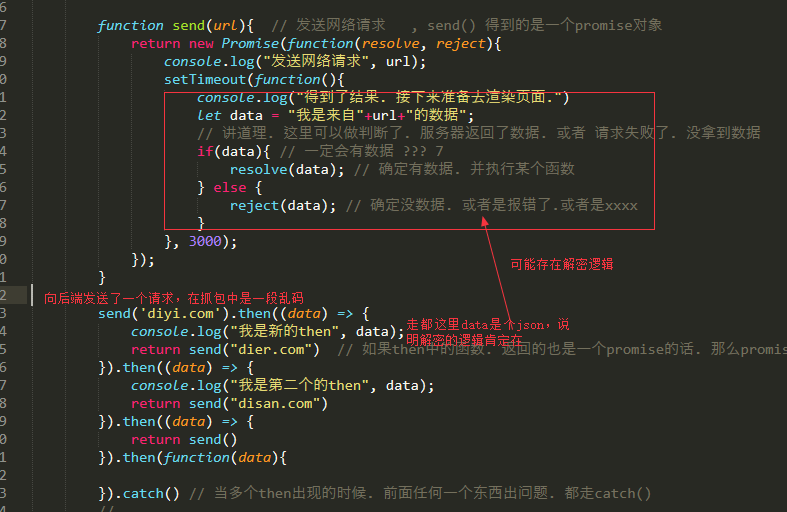

## 逗号运算符

依次运行逗号隔开的代码
```js
function fn(){
    console.log(1), console.log(2), console.log(3);
};
fn()
```
输出;
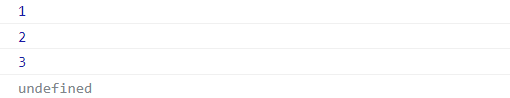

```js
// 一次声明多个变量
let a = 10, b, c = 30, d, e, f, g = 20;

console.log(a);  // 10
console.log(b);  // un
console.log(c);  // 30
console.log(d);  // un
console.log(e);  // un
console.log(f);  // un
console.log(g);  // 20

// 逗号出现在括号中
a = 0
a = (a++, 3)  // a的值是3， 执行a++, 然后将3返回赋值给a

// return时，多个逗号，执行所有逗号表达式，返回最后一个表达式的执行结果

function fn(i){
    return i++,++i,i++;
}

// 可以将return转换代码为下面
function fn(i){
    i++;
    ++i;
    return i++;
}
```

逆向中常用的绕法，要学会拆解这种写法
```js
function d(d, e, f, g) {
    var h = {}
      , i = a(16);
    return h.encText = b(d, g),
        h.encText = b(h.encText, i),
        h.encSecKey = c(i, e, f),
        h
}
```

## 三元运算符

```js
let a = 10;
let b = 20;

let c = a > b? a: b;  // 表达式成立返回a，不成立返回b
```

# html和js交互(选修)

## html事件和js函数

html的button标签绑定一个点击事件，点击事件为函数的调用。
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
<!--      点击事件绑定的是函数名字加括号-->
<button onclick="fn()">点击</button>  
<script>
        function fn() {
            console.log("点我了干啥子");
        }
    </script>
</body>
</html>
```

在整个页面进行加载时就要执行一些动作
- 给body绑定一个onload事件

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>

</head>
<!--  加载完成后自动执行fn函数-->
<body onload="fn()">  
<script>
        function fn() {
            window.open('http://www.baidu.com')
        }
</script>
</body>
</html>
```

阻止a标签的href默认调用，并添加按一个点击事件
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
<a href="javascript:void(0);" onclick="fn()">百度</a>
<script>
        function fn() {
            console.log("点我了干啥子");
            window.location.href = "http://www.baidu.com";  // 不写href也可以完成页面跳转
        }
    </script>
</body>
</html>
```

标签的事件：
- click		点击事件
- focus		获取焦点
- blur		失去焦点
- submit		提交表单
- change		更换选项
- scroll		滚动条滚动
- mouseover	鼠标滑过
- mouseout	鼠标滑出
- mousemove	鼠标滑动

一般事件绑定不会直接写在标签中，会在js中获取到标签并为其绑定事件
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>


</head>
<body>
    <button id="btn1">我是按钮1</button>
    <button id="btn2">我是按钮2</button>
</body>

<script>
    // document是整个页面，通过id获取到某个标签
    let b1 = document.getElementById('btn1');
    // 通过报错得知. b1是null
    // 绑定事件的方案
    b1.addEventListener('click', function(){
        console.log("我要上西天");
        b1.innerText = "我要去南天门!";
    });
    
    // 拿到页面标签句柄的常用方式， "#后面是id值"  ".后面是class的值"
    let b1 = document.querySelector("#btn1");  // 选择器  拿一个
    // let b1 = document.querySelectorAll();  // 选择器 拿一堆
    
</script>
</html>
```

# jquery

```js
// 页面加载完成后执行一些事情
$(function(){  // 等价于 window.onload = function(){}
    // 做一些事情，如给标签绑定事件
    $(".btn").click(function(){
        // 在点击button是做一些事情
    })
})
```